In [214]:
# Importing Libraries

# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading
import os

In [215]:
# Loading dataset
os.chdir("C:\\04-AIML\\07 Unsupervised Learning")
df = pd.read_csv("Part3 - vehicle.csv")

In [216]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [217]:
# Merged data shape
df.shape
print("data Shape is :", df.shape)

data Shape is : (846, 19)


In [218]:
# Merged data size
df.size
print("data Size is :", df.size)

data Size is : 16074


In [219]:
# Checking for Datatypes
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [220]:
# Replace " " to nan
df = df.replace(" ", np.nan)

In [221]:
# Check Missing Value
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [222]:
# Fill missing value with median
df.fillna(df.median(), inplace=True)

In [223]:
# Check Missing Value
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

**CONCLUSION**: **"Missing"** values are replaced with **Median** of the respective attributes

In [224]:
df_new = df.copy()

In [225]:
# Descriptive Statistics
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


Observations
Let us consider the following,

Max_Whisker =  Q3+(1.5∗(IQR)) 
Min_Whisker =  Q1−(1.5∗(IQR)) 
compactness - Looks evenly distributed as mean(93.6) and median(93) are very close and also no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

circularity - Looks evenly distributed as mean(44.8) and median(44) are very close and also no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

distance_circularity - Looks evenly distributed as mean(82) and median(80) are very close and also no outliers as max and min value are within Max_Whisker and Min_Whisker respectively. Despite having no outliers, the reason for mean being slightly higher would be because there are more records above the median value.

radius_ratio - Looks evenly distributed as mean(168.8) and median(167) are very close. However there are outliers on the higher side as  max_value(333)>Max_Whisker .

pr.axis_aspect_ratio - Looks evenly distributed if consider min, Q1,Q2,Q3 as mean(61.6) and median(61) are very close. However there are few outliers on the higher side as  max_value(138)>Max_Whisker . Hence right skewed.

max.length_aspect_ratio - Looks evenly distributed if consider min, Q1,Q2,Q3 as mean(8.5) and median(8) are very close. However there are many outliers on the higher side as  max_value(55)>Max_Whisker  and few on the lower side as well as  min_value(2)>Min_Whisker . Hence right skewed.

scatter_ratio - Looks skewed towards right as mean(168.9) is greater than the median(157) and there are outliers as  max_value(265)>Max_Whisker .

elongatedness - Looks evenly distributed with mean(41) and median(43) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

pr.axis_rectangularity - Looks evenly distributed with mean(20.5) and median(20) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

max.length_rectangularity - Looks evenly distributed with mean(147) and median(146) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker respectively

scaled_variance - Looks skewed towards right as mean(188) is greater than the median(179) and there are outliers as  max_value(320)>Max_Whisker .

scaled_variance.1 - Looks skewed towards right as mean(439) is greater than the median(363) and there are outliers as  max_value(1018)>Max_Whisker .

scaled_radius_of_gyration - Looks evenly distributed with mean(174) and median(173.5) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker

scaled_radius_of_gyration.1 - Looks evenly distributed if consider min, Q1,Q2,Q3 as mean(72.4) and median(71.5) are very close. However there are many outliers on the higher side as  max_value(135)>Max_Whisker . Hence right skewed.

skewness_about - Min value is zero. Looks evenly distributed if consider Q1,Q2,Q3 as mean(6.3) and median(6) are very close. However there are many outliers on the higher side as  max_value(22)>Max_Whisker . Hence right skewed.

skewness_about.1 - Min value is zero. Looks skewed towards right as mean(12.6) is greater than median(11) and there are few outliers on the higher side as  max_value(41)>Max_Whisker . Hence right skewed.

skewness_about.2 - Looks evenly distributed with mean(188.9) and median(188) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker

hollows_ratio - Looks evenly distributed with mean(195.6) and median(197) are close and there are no outliers as max and min value are within Max_Whisker and Min_Whisker

In [226]:
def boxplot(figRows,figCols,xSize, ySize, features, colors, hue=None, orient='h', rotation=30):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.boxplot(features[row][col], data= vehicle, color=colors[row][col], ax=axesplt, orient=orient, hue=hue)
            plot.set_ylabel('',fontsize=20)
            plot.set_xticklabels(rotation=rotation, labels=[features[row][col]], fontweight='demibold',fontsize='large')

In [227]:
def boxplot_all(xSize, ySize, palette, data):
    f, axes = plt.subplots(1, 1, figsize=(xSize, ySize))
    plot = sns.boxplot(x='variable',y='value', data= pd.melt(data), palette='Set1', ax=axes, orient='v')
    plot.set_xlabel('',fontsize=20)
    plot.set_xticklabels(rotation=60, labels=plot.get_xticklabels(),fontweight='demibold',fontsize='x-large')

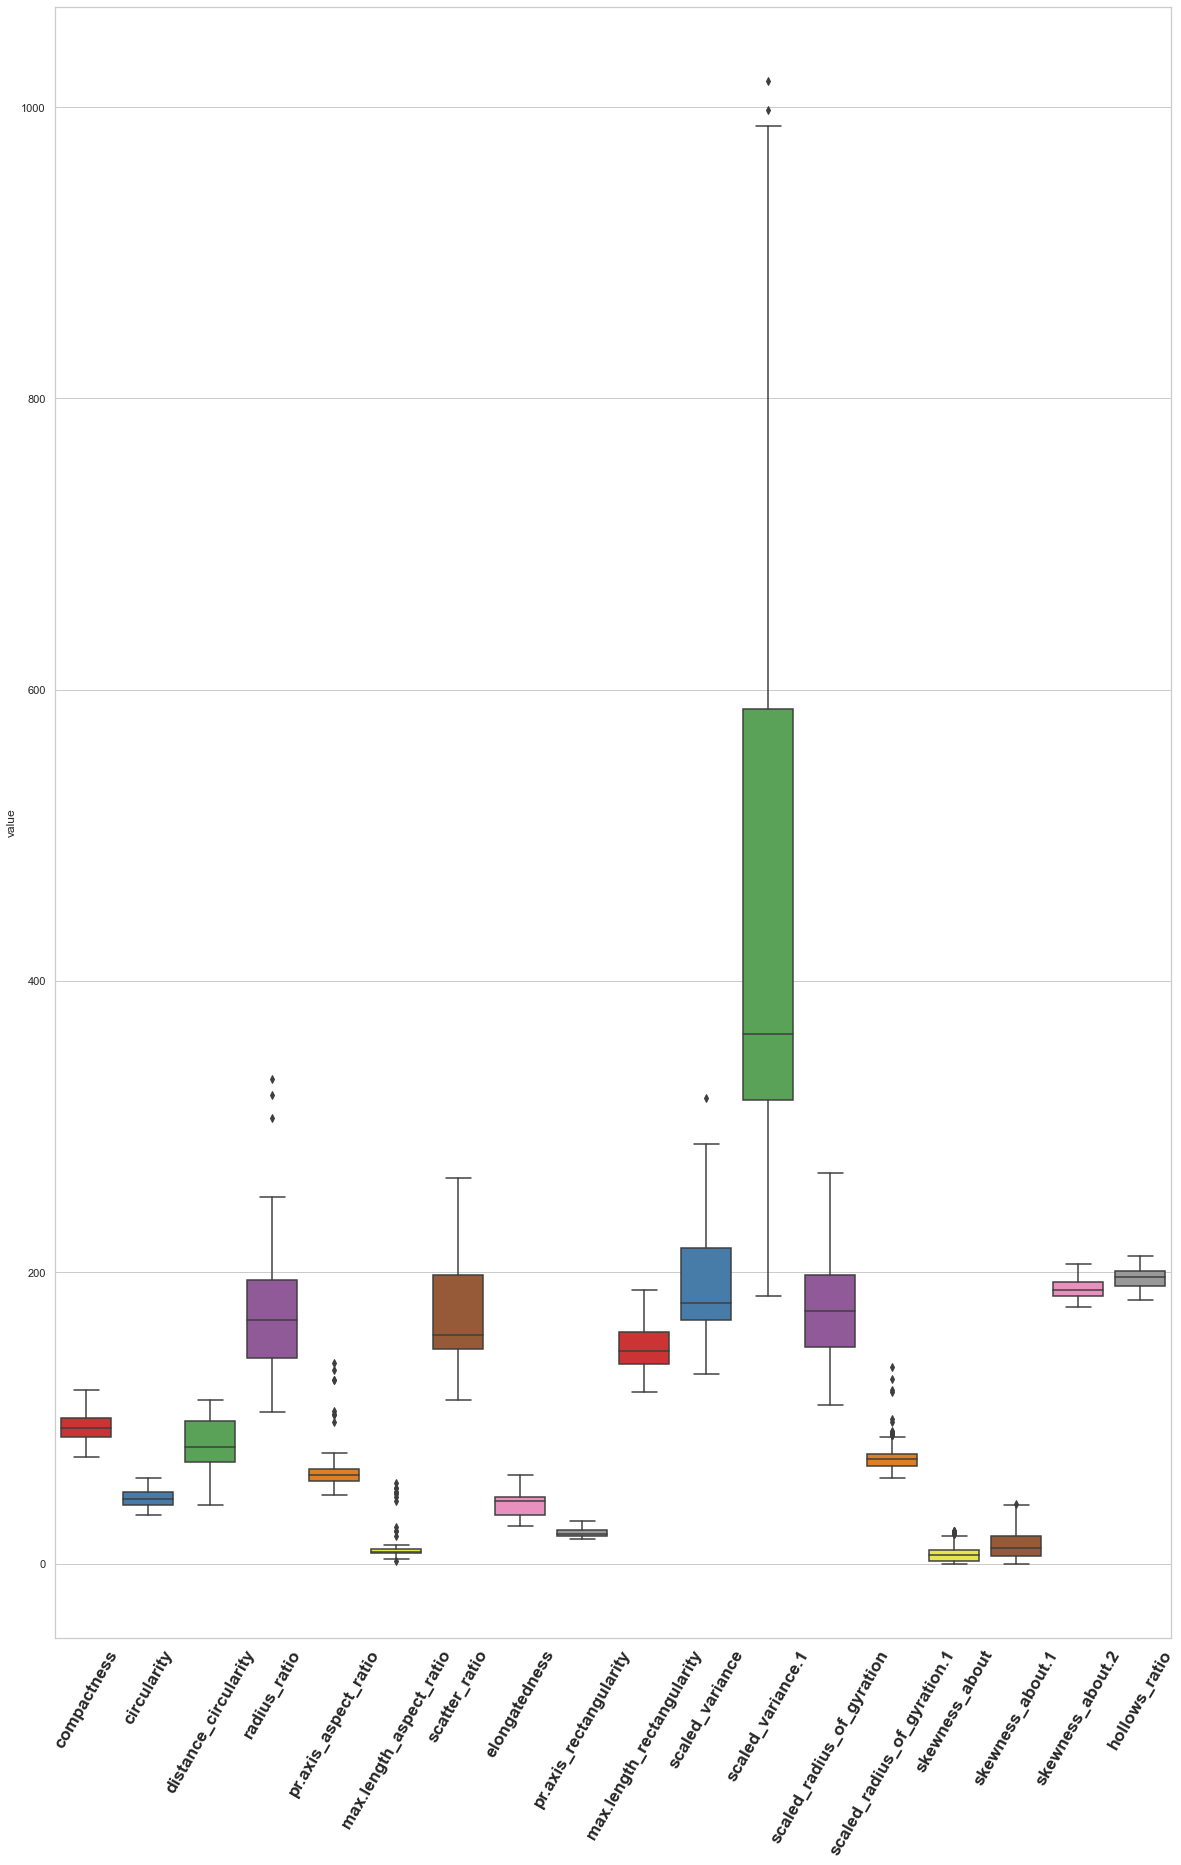

In [228]:
boxplot_all(20,30,palette=['Set1'], data =df.iloc[:,:18])

In [229]:
def distplot(figRows,figCols,xSize, ySize, features, colors):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.distplot(df[features[row][col]], color=colors[row][col], ax=axesplt, kde=True, hist_kws={"edgecolor":"k"})
            plot.set_xlabel(features[row][col],fontsize=20)

In [230]:
pal = sns.color_palette(palette='Set1', n_colors=16)

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

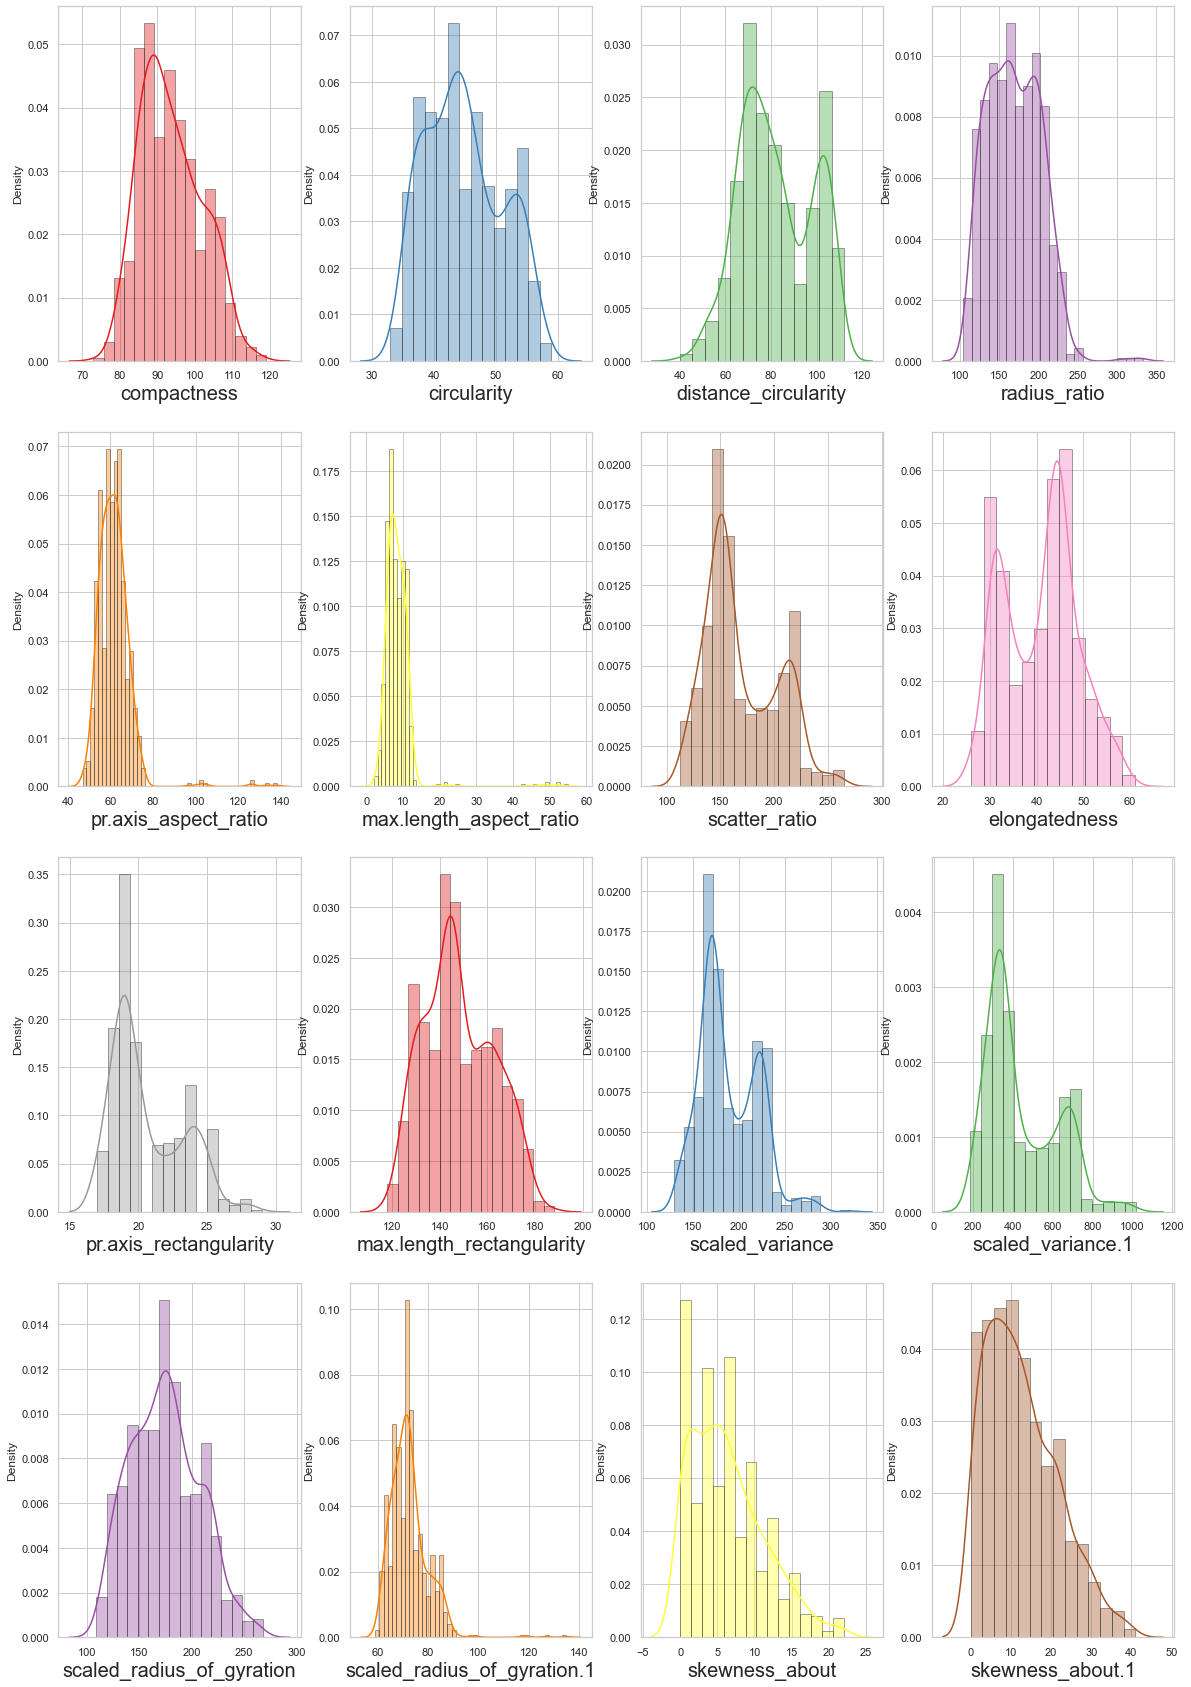

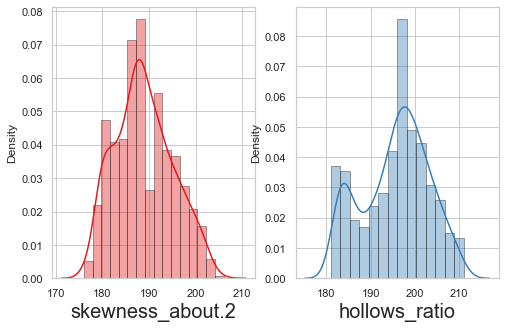

In [231]:
distplot(4, 4, 20, 30, df.columns[:16].tolist(), pal.as_hex())
distplot(1, 2, 8, 5, df.columns[16:18].tolist(), pal.as_hex()[:2]);

# Observations
compactness - Looks normally distributed.

circularity - Looks uniformly distributed.

distance_circularity - Looks evenly distributed but there are more values distributed on the higher side.

radius_ratio - Looks skewed towards right as we can see few values above 300. Must be outliers.

pr.axis_aspect_ratio - Looks skewed towards right as we can see few values above 100. Must be outliers.

max.length_aspect_ratio - Looks skewed towards right as we can see few values above 20. Must be outliers.

scatter_ratio - Looks evenly distributed.

elongatedness - Looks evenly distributed.

pr.axis_rectangularity - Looks evenly distributed with few values missing between 20 and 25.

max.length_rectangularity - Looks normally distributed.

scaled_variance - Looks skewed towards right as we can see few values above 300. Must be outliers.

scaled_variance.1 - Looks skewed towards right as we can see few values above 1000. Must be outliers.

scaled_radius_of_gyration - Looks normally distributed.

scaled_radius_of_gyration.1 - Looks skewed towards right as we can see few values above 100. Must be outliers.

skewness_about - Looks skewed towards right as we can see few values above 20. Must be outliers.

skewness_about.1 - Looks skewed towards right as we can see few values above 40. Must be outliers.

skewness_about.2 - Looks normally distributed.

hollows_ratio - Looks evenly distributed.

In [232]:
def boxplot(figRows,figCols,xSize, ySize, features, colors, hue=None, orient='h', rotation=30):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.boxplot(features[row][col], data= df, color=colors[row][col], ax=axesplt, orient=orient, hue=hue)
            plot.set_ylabel('',fontsize=20)
            plot.set_xticklabels(rotation=rotation, labels=[features[row][col]], fontweight='demibold',fontsize='large')

In [233]:
def boxplot_all(xSize, ySize, palette, data):
    f, axes = plt.subplots(1, 1, figsize=(xSize, ySize))
    plot = sns.boxplot(x='variable',y='value', data= pd.melt(data), palette='Set1', ax=axes, orient='v')
    plot.set_xlabel('',fontsize=20)
    plot.set_xticklabels(rotation=60, labels=plot.get_xticklabels(),fontweight='demibold',fontsize='x-large')

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-232-f98e343d72f7>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=rotation, labels=[features[row][col]], fontweight='demibold',fontsize='large')
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-232-f98e343d72f7>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.se

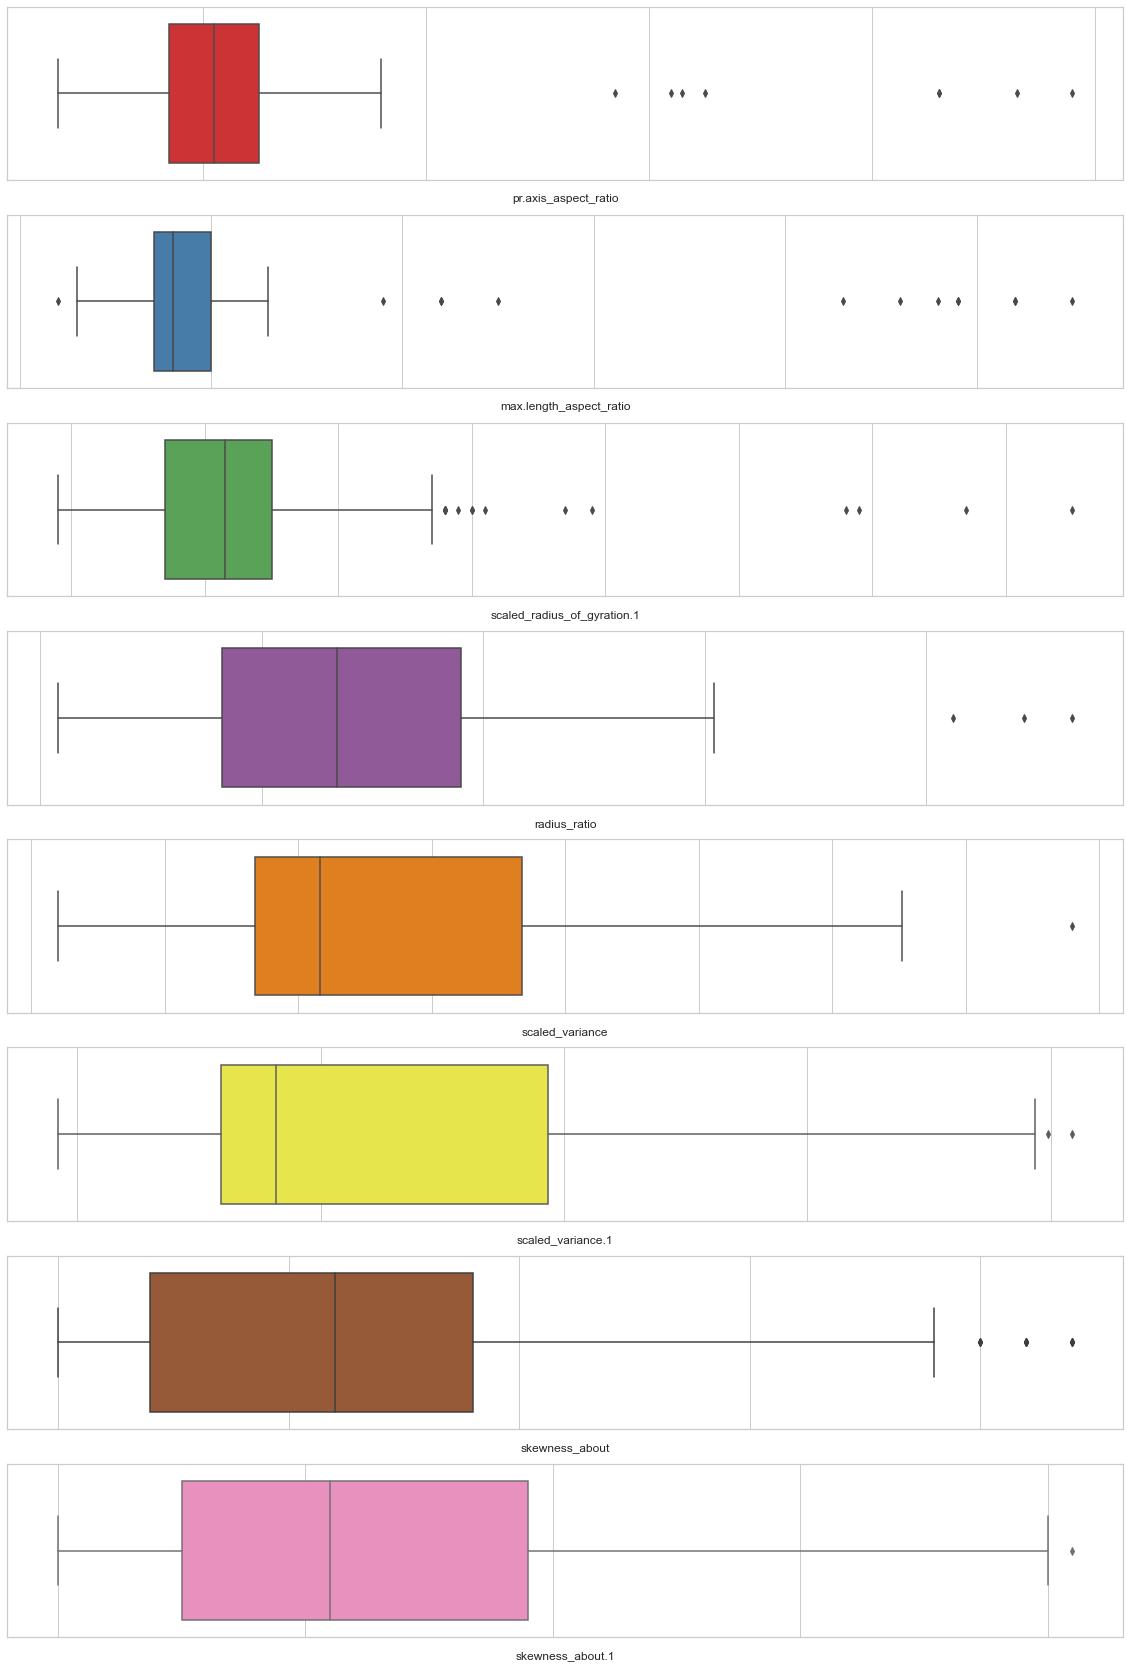

In [234]:
boxplot(8, 1, 20, 30, orient='h', 
        features=['pr.axis_aspect_ratio',
                  'max.length_aspect_ratio',
                  'scaled_radius_of_gyration.1',
                  'radius_ratio',
                  'scaled_variance',
                  'scaled_variance.1',
                 'skewness_about',
                 'skewness_about.1'], 
        colors=pal.as_hex()[:8])

Observations
pr.axis_aspect_ratio - Several outliers are seen on the higher side

max.length_aspect_ratio - Several outliers are seen on the higher side and one on the lower side as well.

scaled_radius_of_gyration.1 - Several outliers are seen on the higher side with some values being very large.

radius_ratio - Few outliers are seen on the higher side.

scaled_variance - One outlier is seen on the higher side.

scaled_variance.1 - Two outliers are seen on the higher side.

skewness_about - Three outliers are seen on the higher side.

skewness_about.1 - One outlier is seen on the higher side.

And hence confirms the skewness for theses attributes

In [235]:
def point_box_bar_plot(row, col, figRow, figCol, palette='rocket', fontsize='large', fontweight='demibold'):
    sns.set(style="whitegrid")
    f, axes = plt.subplots(3, 1, figsize=(figRow, figCol))
    pplot=sns.pointplot(row,col, data=df, ax=axes[0], linestyles=['--'])
    pplot.set_xlabel(None)
    pplot.set_xticklabels(labels=pplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)
    bxplot=sns.boxplot(row,col, data=df, ax=axes[1],palette='Paired')
    bxplot.set_xlabel(None)
    bxplot.set_xticklabels(labels=bxplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)
    bplot=sns.barplot(row,col, data=df, ax=axes[2],palette=palette)
    bplot.set_xlabel(row,fontsize=20)
    bplot.set_xticklabels(labels=bplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


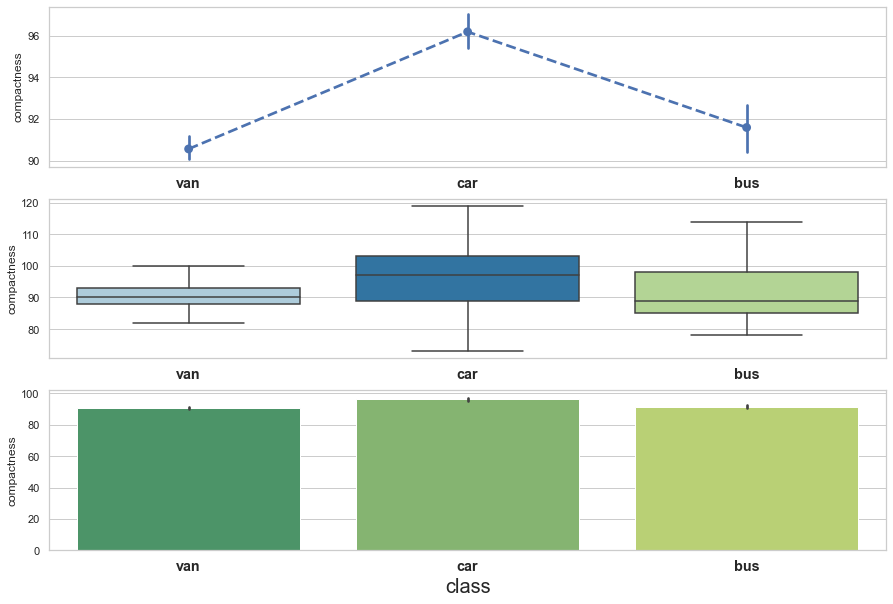

In [236]:
point_box_bar_plot('class','compactness', 15, 10, palette='summer')

Observations
As shown, compactness of the car is higher than others with values for bus and van being close.
bus having large range of compactness compared to van.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


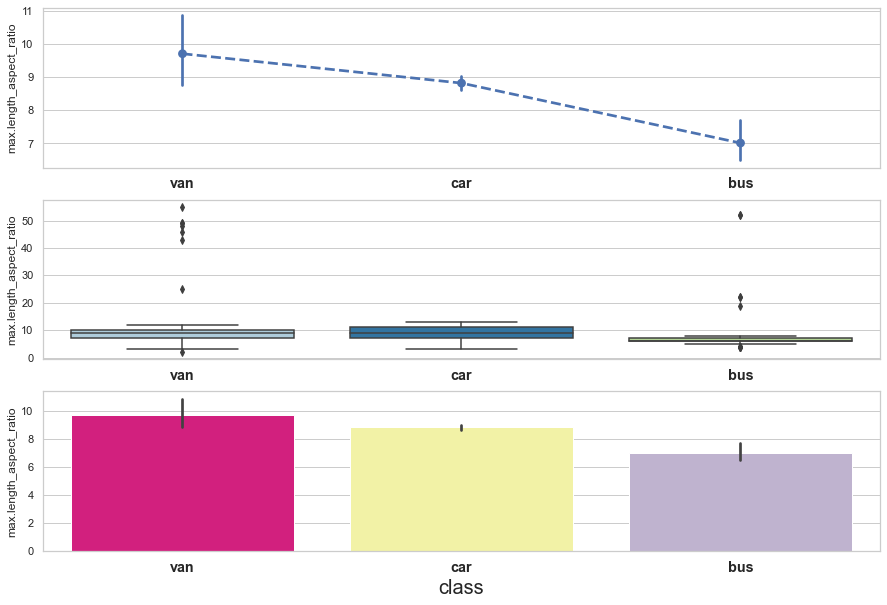

In [237]:
point_box_bar_plot('class','max.length_aspect_ratio', 15, 10, palette='Accent_r')

 Observations

Outliers are detected for van and bus.

No outliers for car.

max.length_aspect_ratio of the van is higher because of several large outliers. It is followed by car and then bus.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


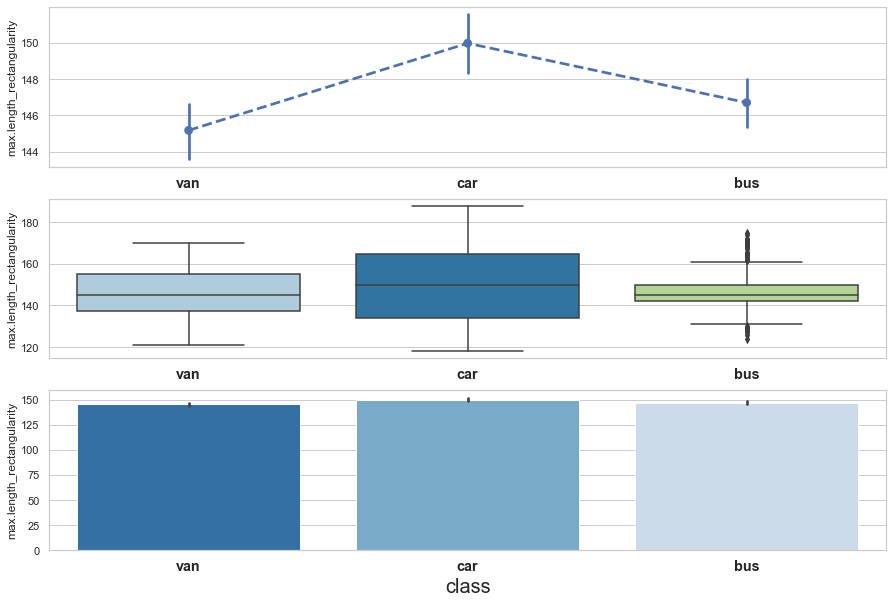

In [238]:
point_box_bar_plot('class','max.length_rectangularity', 15, 10, palette='Blues_r')


Observations

max.length_rectangularity of the car is higher followed by bus and then van.

Outliers are detected for bus and hence its value is shown higher than van despite van having larger range of 

max.length_rectangularity

Observations

hollows_ratio of the car and van are very close followed by bus.

Outliers are detected for car on the lower side

bus is having large range of hollows_ratio compared to others.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


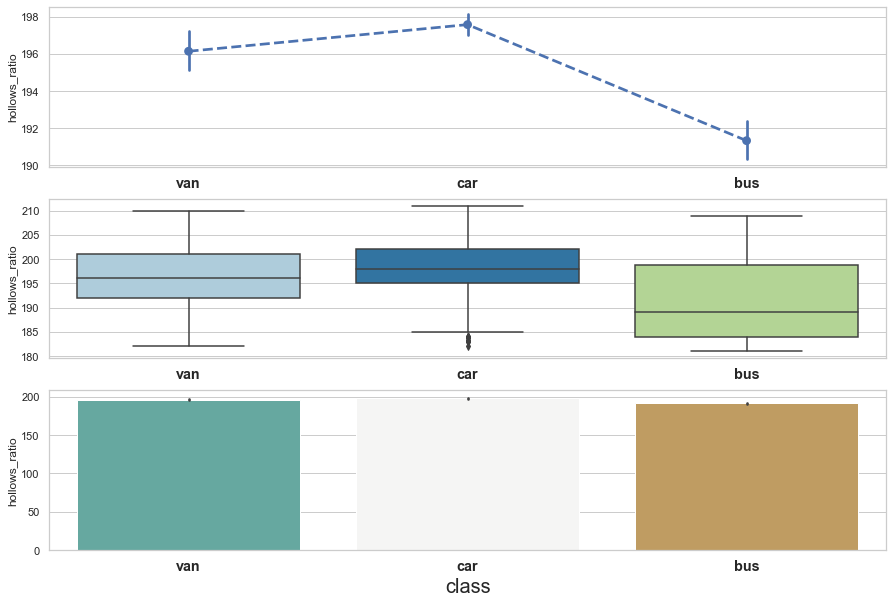

In [239]:
point_box_bar_plot('class','hollows_ratio', 15, 10, palette='BrBG_r')

Observations

hollows_ratio of the car and van are very close followed by bus.

Outliers are detected for car on the lower side

bus is having large range of hollows_ratio compared to others.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


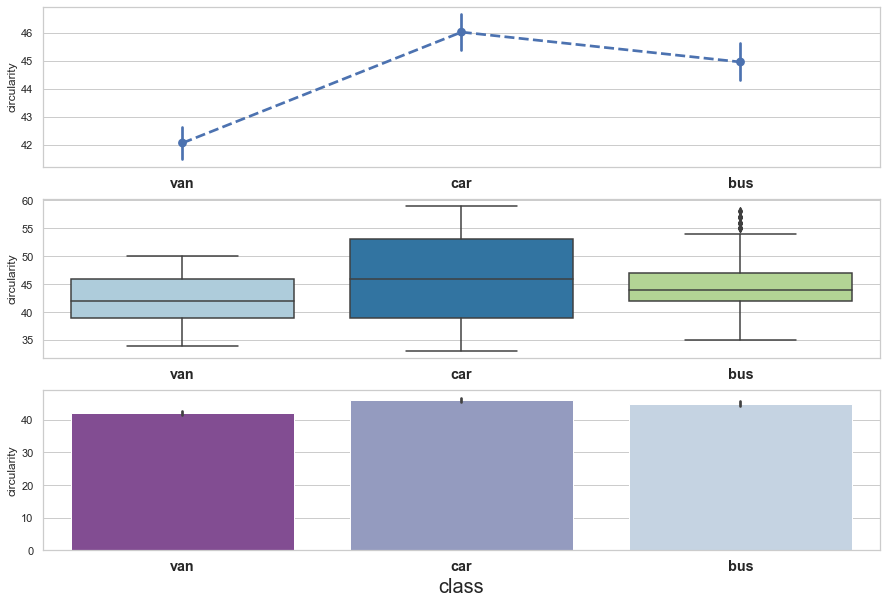

In [240]:
point_box_bar_plot('class','circularity', 15, 10, palette='BuPu_r')

Observations

circularity of the car and bus are very close followed by van.

Outliers are detected for bus on the higher side

car is having large range of circularity compared to others.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


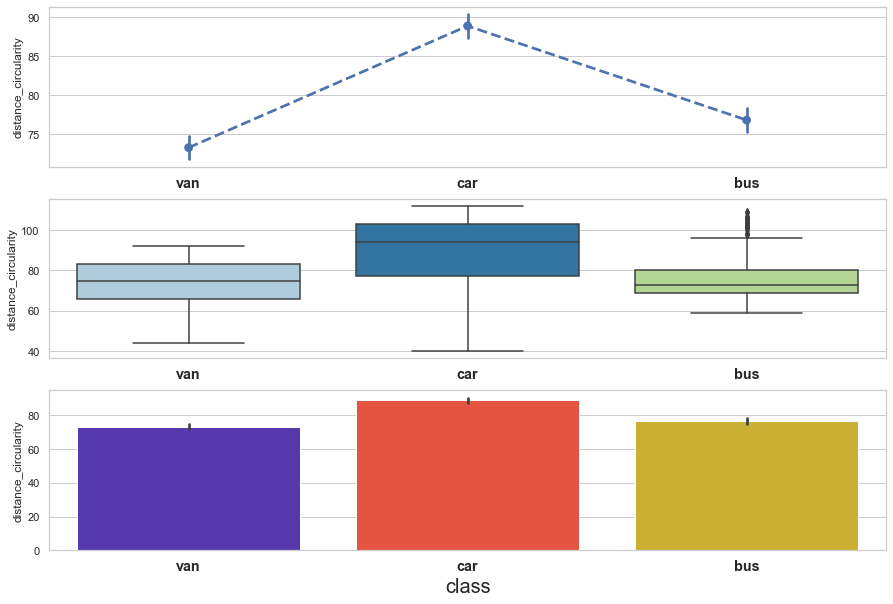

In [241]:
point_box_bar_plot('class','distance_circularity', 15, 10, palette='CMRmap')

Observations

distance_circularity of the car is higher compared to others followed by bus and then by van.

Outliers are detected for bus on the higher side.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


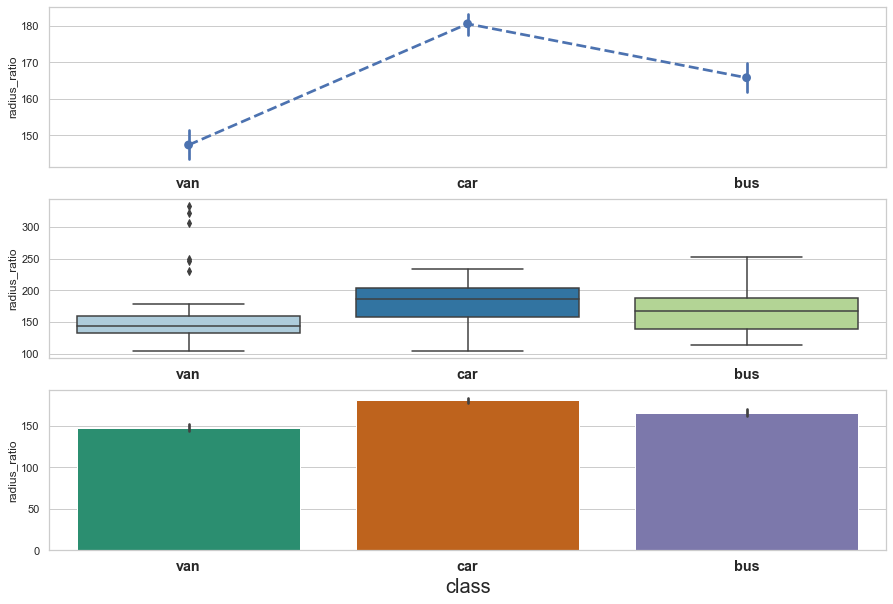

In [242]:
point_box_bar_plot('class','radius_ratio', 15, 10, palette='Dark2')

Observations

radius_ratio of the car is higher compared to others followed by bus and then by van.

Outliers are detected for van on the higher side.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


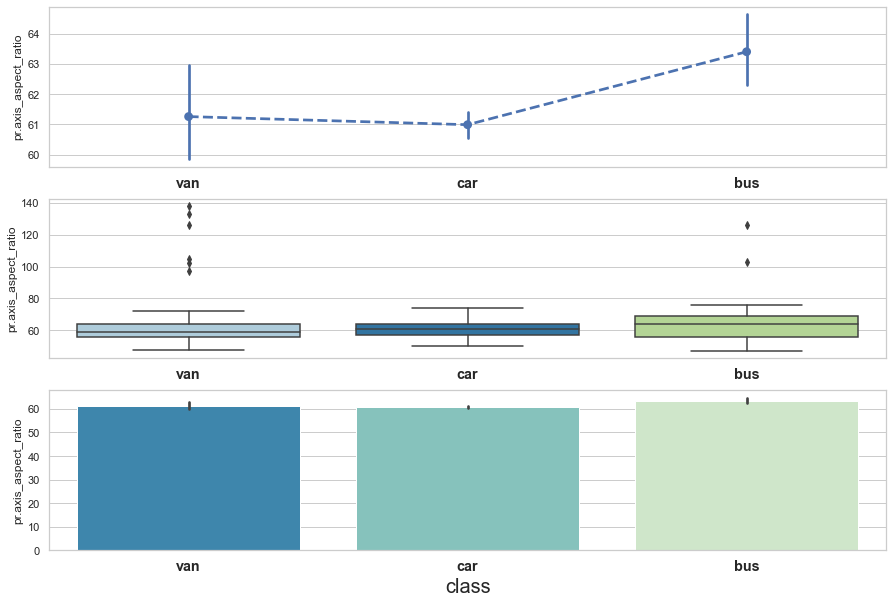

In [243]:
point_box_bar_plot('class','pr.axis_aspect_ratio', 15, 10, palette='GnBu_r')

Observations

Outliers are detected for van and bus.

No outliers for car.

pr.axis_aspect_ratio of bus is higher than others.

Despite having large outliers, pr.axis_aspect_ratio of van and car are close.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


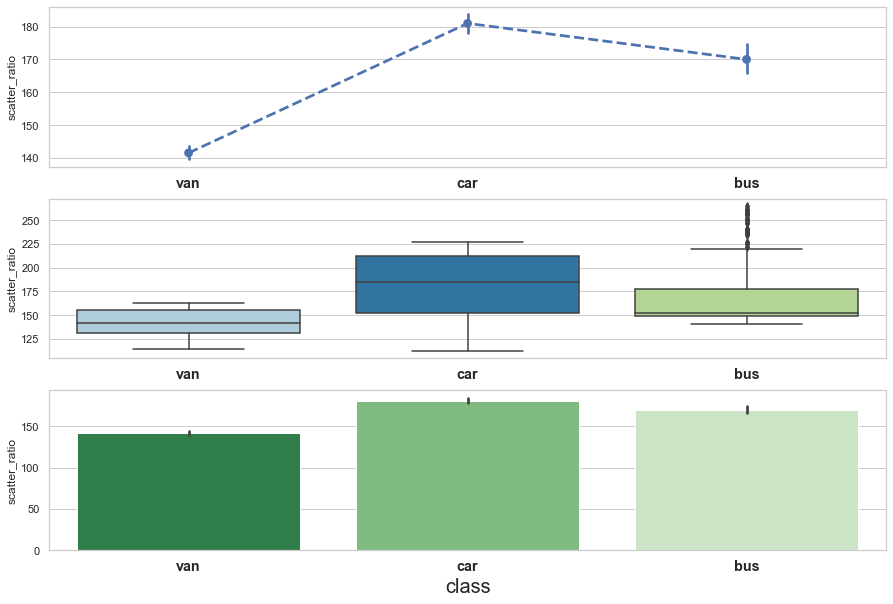

In [244]:
point_box_bar_plot('class','scatter_ratio', 15, 10, palette='Greens_r')

Observations

Outliers are detected for bus.

scatter_ratio of car is higher followed by bus.

scatter_ratio of van is low.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


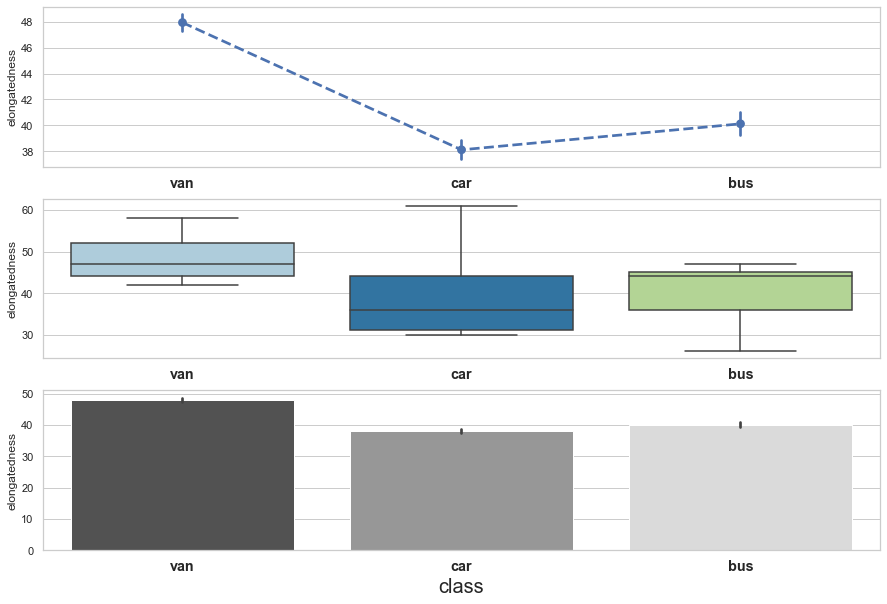

In [245]:
point_box_bar_plot('class','elongatedness', 15, 10, palette='Greys_r')

Observations

No Outliers detected.

elongatedness of van is very high compared to others

elongatedness of bus is higher with car being the lowest.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


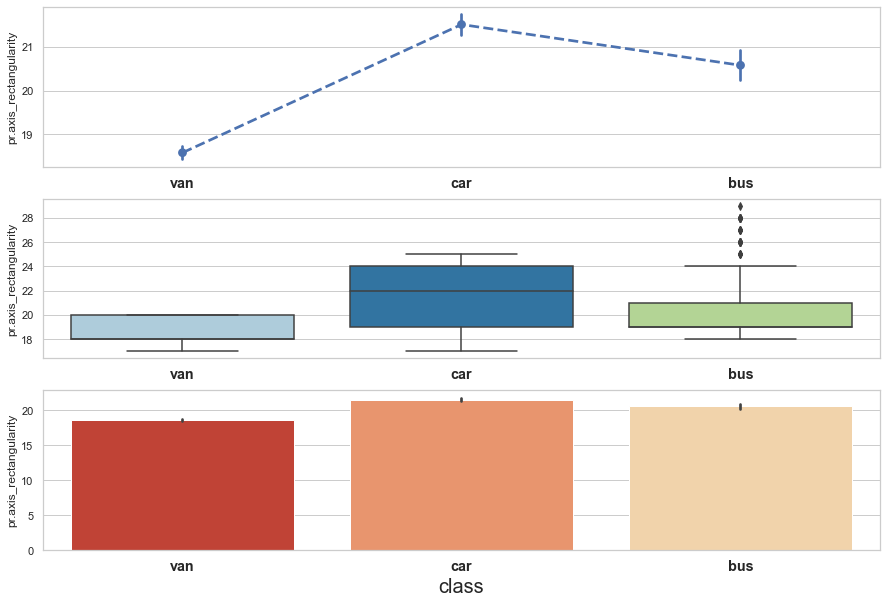

In [246]:
point_box_bar_plot('class','pr.axis_rectangularity', 15, 10, palette='OrRd_r')

Observations

Outliers are detected for bus.

pr.axis_rectangularity of car is higher followed by bus.

pr.axis_rectangularity of van is low.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


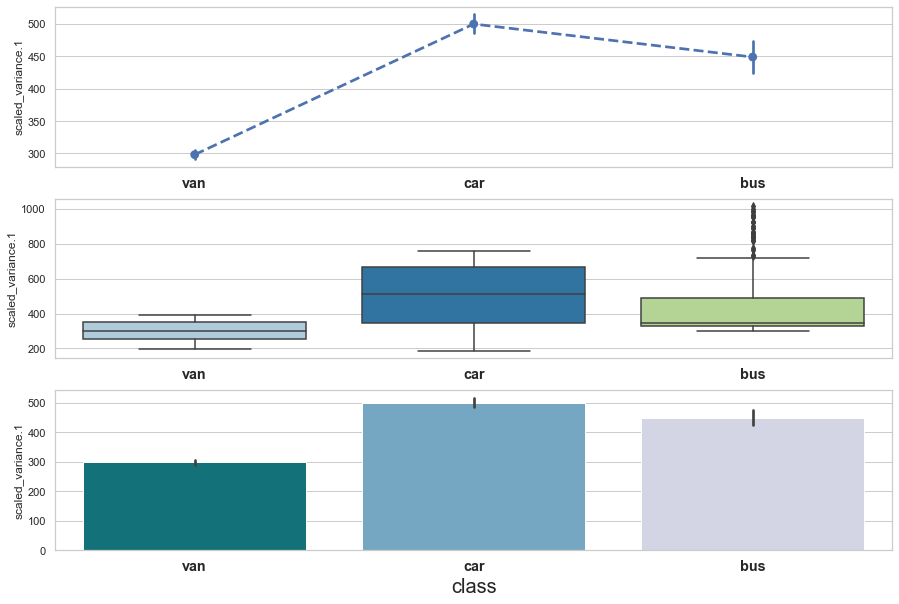

In [247]:
point_box_bar_plot('class','scaled_variance.1', 15, 10, palette='PuBuGn_r')

Observations

Outliers are detected for bus.

scaled_variance.1 of car is higher followed by bus.

scaled_variance.1 of van is low.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


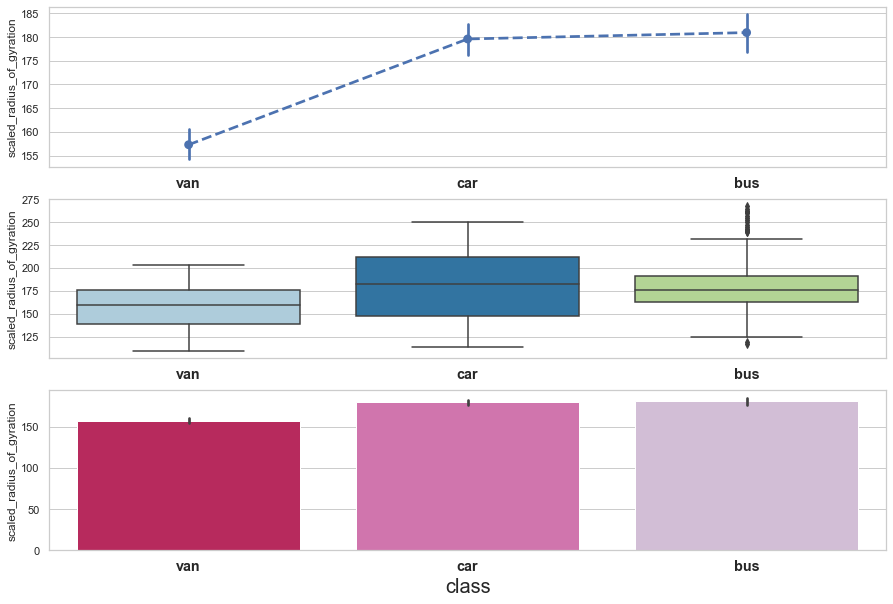

In [248]:
point_box_bar_plot('class','scaled_radius_of_gyration', 15, 10, palette='PuRd_r')

Observations

Outliers are detected for bus.

scaled_radius_of_gyration of car and bus are very close and is higher.

Despite car having larger range of scaled_radius_of_gyration, outliers of bus push it slightly higher.

scaled_radius_of_gyration of van is low.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


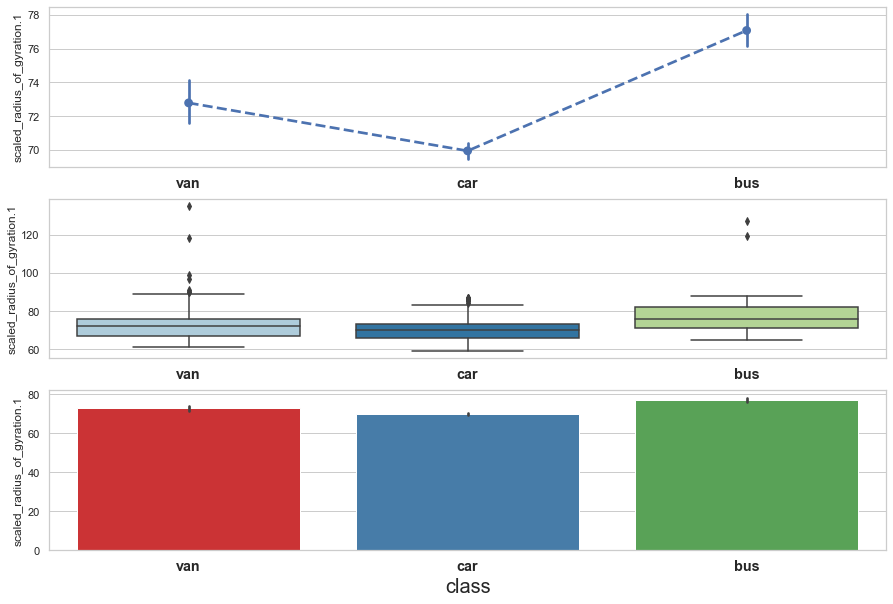

In [249]:
point_box_bar_plot('class','scaled_radius_of_gyration.1', 15, 10, palette='Set1')

Observations

Outliers are detected for van, car and bus.

scaled_radius_of_gyration.1 of bus is higher than others followed by van and then by car.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


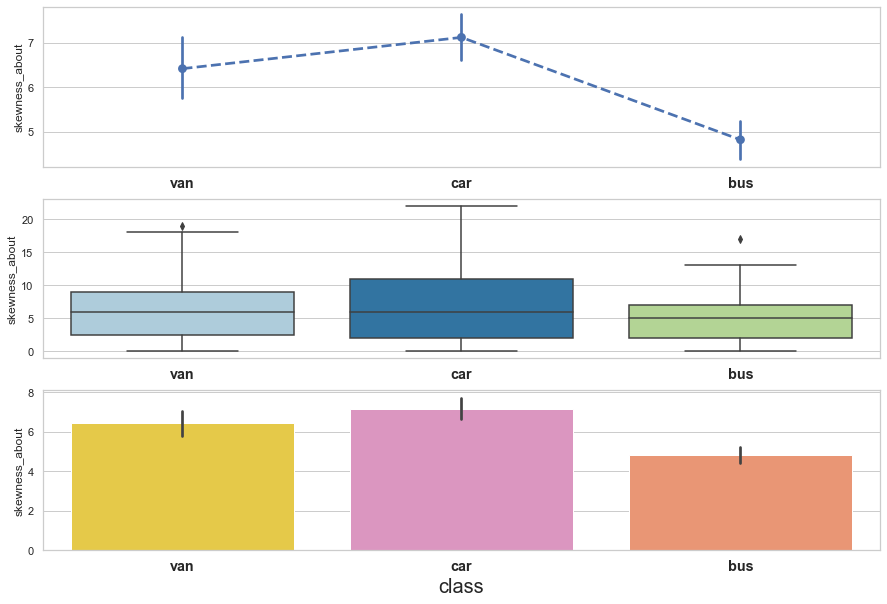

In [250]:
point_box_bar_plot('class','skewness_about', 15, 10, palette='Set2_r')

Observations

Outliers are detected for van and bus.

skewness_about.1 of car is higher than others.

skewness_about.1 of van and bus are lower.

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


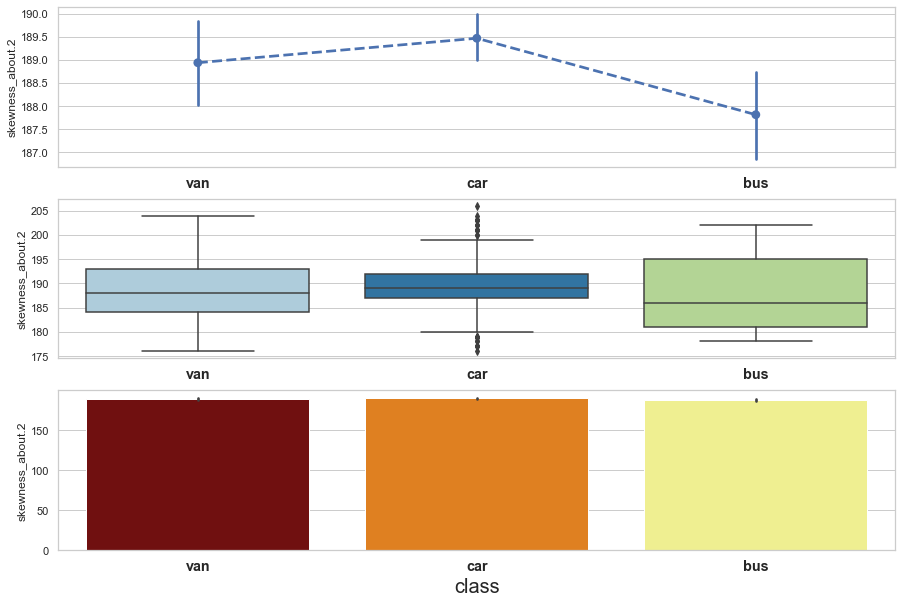

In [251]:
point_box_bar_plot('class','skewness_about.2', 15, 10, palette='afmhot')

Observations

Outliers are detected for car on both higher and lower side.

skewness_about.2 of car is higher than others followed by van.

skewness_about.2 of bus is lowest.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'compactness'),
  Text(1.5, 0, 'circularity'),
  Text(2.5, 0, 'distance_circularity'),
  Text(3.5, 0, 'radius_ratio'),
  Text(4.5, 0, 'pr.axis_aspect_ratio'),
  Text(5.5, 0, 'max.length_aspect_ratio'),
  Text(6.5, 0, 'scatter_ratio'),
  Text(7.5, 0, 'elongatedness'),
  Text(8.5, 0, 'pr.axis_rectangularity'),
  Text(9.5, 0, 'max.length_rectangularity'),
  Text(10.5, 0, 'scaled_variance'),
  Text(11.5, 0, 'scaled_variance.1'),
  Text(12.5, 0, 'scaled_radius_of_gyration'),
  Text(13.5, 0, 'scaled_radius_of_gyration.1'),
  Text(14.5, 0, 'skewness_about'),
  Text(15.5, 0, 'skewness_about.1'),
  Text(16.5, 0, 'skewness_about.2'),
  Text(17.5, 0, 'hollows_ratio')])

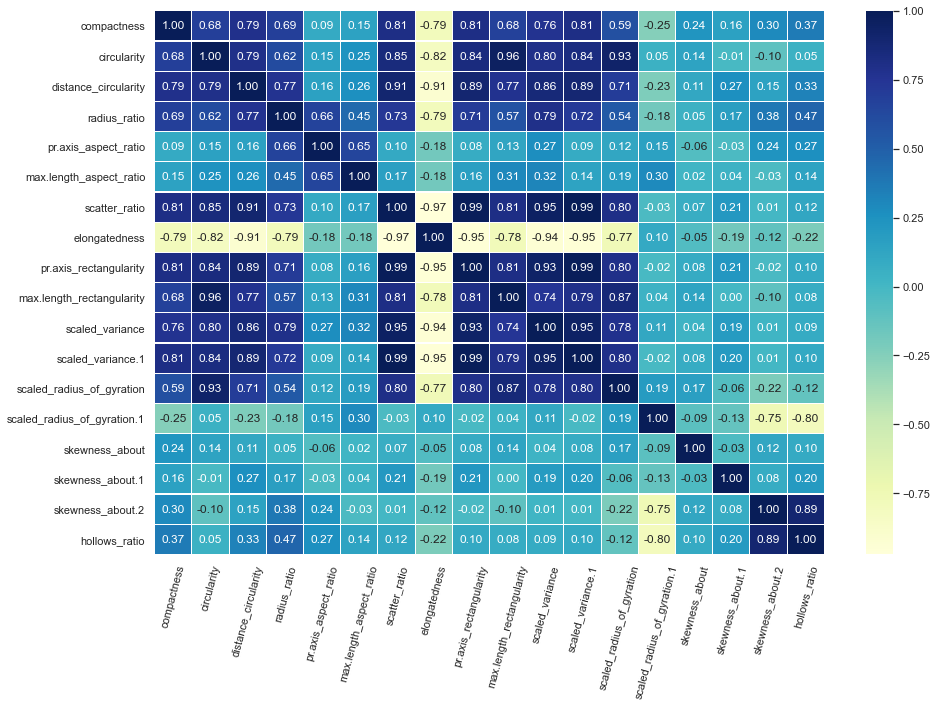

In [252]:
# Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(15, 10))
cor_mat = df.corr()
hplot = sns.heatmap(cor_mat, annot=True, fmt=".2f", ax=axes, linecolor='white', linewidths=0.2, cmap='YlGnBu')
plt.xticks(rotation=75)

Below are the values which are negatively correlated

a. elongatedness - distance_circularity (-0.91)

b. elongatedness - scatter_ratio (-0.97)

c. elongatedness - pr.axis_rectangularity (-0.95)

d. elongatedness - scaled_variance (-0.94)

e. elongatedness - scaled_variance.1 (-0.95)

Below are the values which are positively correlated

a.circularity - max.length_rectangularity (0.96)

b. circularity - scaled_radius_of_gyration (0.93)

c. distance_circularity - scatter_ratio (0.91)

d. scatter_ratio - pr.axis_rectangularity (0.99)

e. scatter_ratio - scaled_variance (0.95)

f. scatter_ratio - scaled_variance.1 (0.99)

g. pr.axis_rectangularity - scaled_variance (0.93)

h. pr.axis_rectangularity - scaled_variance.1 (0.99)

i. scaled_variance - scaled_variance.1 (0.95)

In [253]:
#setting up for customized printing
from IPython.display import Markdown, display
from IPython.display import HTML
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [254]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
printmd('List of columns with correlation higher than 0.90', color='brown')
display(to_drop)

<span style='color:brown'>List of columns with correlation higher than 0.90</span>

[]

In [255]:
# Remove Multicolinear attributes
df.drop(['scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance.1', 'circularity'], axis=1, inplace=True)

<ipython-input-94-bfaf66da4cdf>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


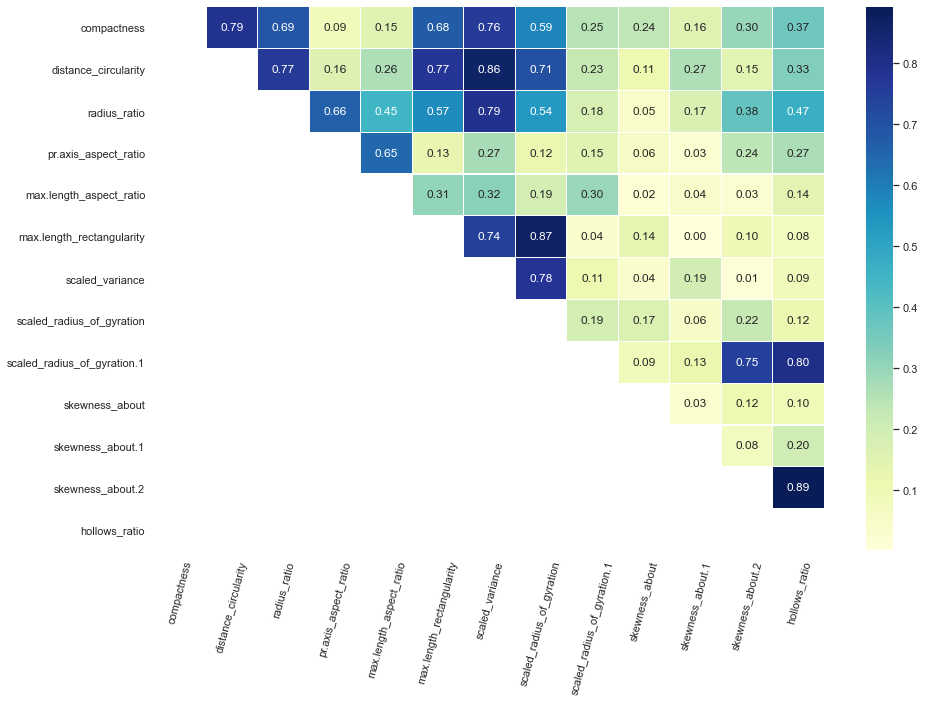

In [256]:
upper = CheckCorrelationUpper(df)

In [257]:
df.shape

(846, 14)

In [258]:
#Removing Outliers using ZScore

def remove_outliers(col, data):
    outlier_col = col + "_outliers"
    data[outlier_col] = data[col]
    data[outlier_col]= zscore(data[outlier_col])

    condition = (data[outlier_col]>3) | (data[outlier_col]<-3)
    print(data[condition].shape)
    indices = data[condition].index
    data.drop(data[condition].index, axis = 0, inplace = True)
    data.drop(outlier_col, axis=1, inplace=True)
    return indices

In [259]:
df.skew().sort_values()

hollows_ratio                 -0.226341
distance_circularity           0.108718
skewness_about.2               0.249985
max.length_rectangularity      0.256359
scaled_radius_of_gyration      0.279910
compactness                    0.381271
radius_ratio                   0.397572
scaled_variance                0.655598
skewness_about.1               0.689014
skewness_about                 0.780813
scaled_radius_of_gyration.1    2.089979
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
dtype: float64

Observations

max.length_aspect_ratio, pr.axis_aspect_ratio, scaled_radius_of_gyration.1 are highly skewed as value is above 2

scatter_ratio, scaled_variance, skewness_about.1, pr.axis_rectangularity, skewness_about, scaled_variance.1 are moderately skewed


In [260]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder   # import label encoder

def lencode(col, data):
    labelencoder = LabelEncoder()
    data[col] = labelencoder.fit_transform(data[col]) # returns label encoded variable(s)
    return data

In [261]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [262]:
# Scaling
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
df.iloc[:,:13] = std_scale.fit_transform(df.iloc[:,:13])

In [263]:
df.head().T

,0,1,2,3,4
compactness,0.16058,-0.32547,1.254193,-0.082445,-1.054545
distance_circularity,0.057177,0.120741,1.519141,-0.006386,-0.76915
radius_ratio,0.273363,-0.835032,1.202018,-0.295813,1.082192
pr.axis_aspect_ratio,1.310398,-0.593753,0.548738,0.167907,5.245643
max.length_aspect_ratio,0.311542,0.094079,0.311542,0.094079,9.444962
max.length_rectangularity,0.758332,-0.344578,0.689401,-0.344578,-0.275646
scaled_variance,-0.40192,-0.593357,1.097671,-0.912419,1.671982
scaled_radius_of_gyration,0.285705,-0.51363,1.392477,-1.466683,0.40868
scaled_radius_of_gyration.1,-0.327326,-0.059384,0.074587,-1.265121,7.309005
skewness_about,-0.073812,0.53839,1.558727,-0.073812,0.53839


In [264]:
#Segregate predictors vs target attributes
X = df.loc[:, df.columns != 'class']
y = df['class']

In [265]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [266]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [267]:
#Lets check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [268]:
print('x_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (592, 13)
y_train shape:  (592,)
x_test shape:  (254, 13)
y_test shape:  (254,)


In [269]:
from sklearn.model_selection import GridSearchCV

def find_best_model(model, parameters):
    clf = GridSearchCV(model, parameters, scoring='accuracy')
    clf.fit(X_train, y_train)             
    print(clf.best_score_)
    print(clf.best_params_)
    print(clf.best_estimator_)
    return clf

In [270]:
from sklearn.svm import SVC
svm = SVC()
parameters = {'kernel':('rbf', 'poly', 'sigmoid'), 'gamma':('scale','auto'), 'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'class_weight': (None, 'balanced')}
clf = find_best_model(svm, parameters)

0.9578122774533542
{'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=1)


In [271]:
svm = clf.best_estimator_
svm.fit(X_train, y_train)  
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

In [272]:
#get Precision Score on train and test
from sklearn import metrics
accuracy_train = round(metrics.accuracy_score(y_train, y_train_pred),3)
accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred),3)
accdf = pd.DataFrame([[accuracy_train],[accuracy_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
accdf

,Accuracy
Training,0.971
Testing,0.953


Observation

This is a good model as we have accuracy of 99.0% for training set and 95.3% for test set

In [273]:
# Confusion Matrix
confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_test

Predicted,bus,car,van
Actual,,,
bus,63,0,4
car,0,124,5
van,0,3,55


Observation

Total number of Type-I and Type-II errors are 12

In [274]:
from scipy.stats import zscore
max_length_aspect_ratio_index = remove_outliers('max.length_aspect_ratio', df)
remove_outliers('pr.axis_aspect_ratio', df)
remove_outliers('scaled_radius_of_gyration.1', df)

(9, 15)
(0, 15)
(0, 15)


Int64Index([], dtype='int64')

In [ ]:
pca_full.explained_variance_ratio_

In [282]:
pca8 = PCA(n_components=8)
X_PCA8 = pca8.fit_transform(X)

In [283]:
p_plot_data = pd.DataFrame(X_PCA8)
p_plot_data['class'] = y

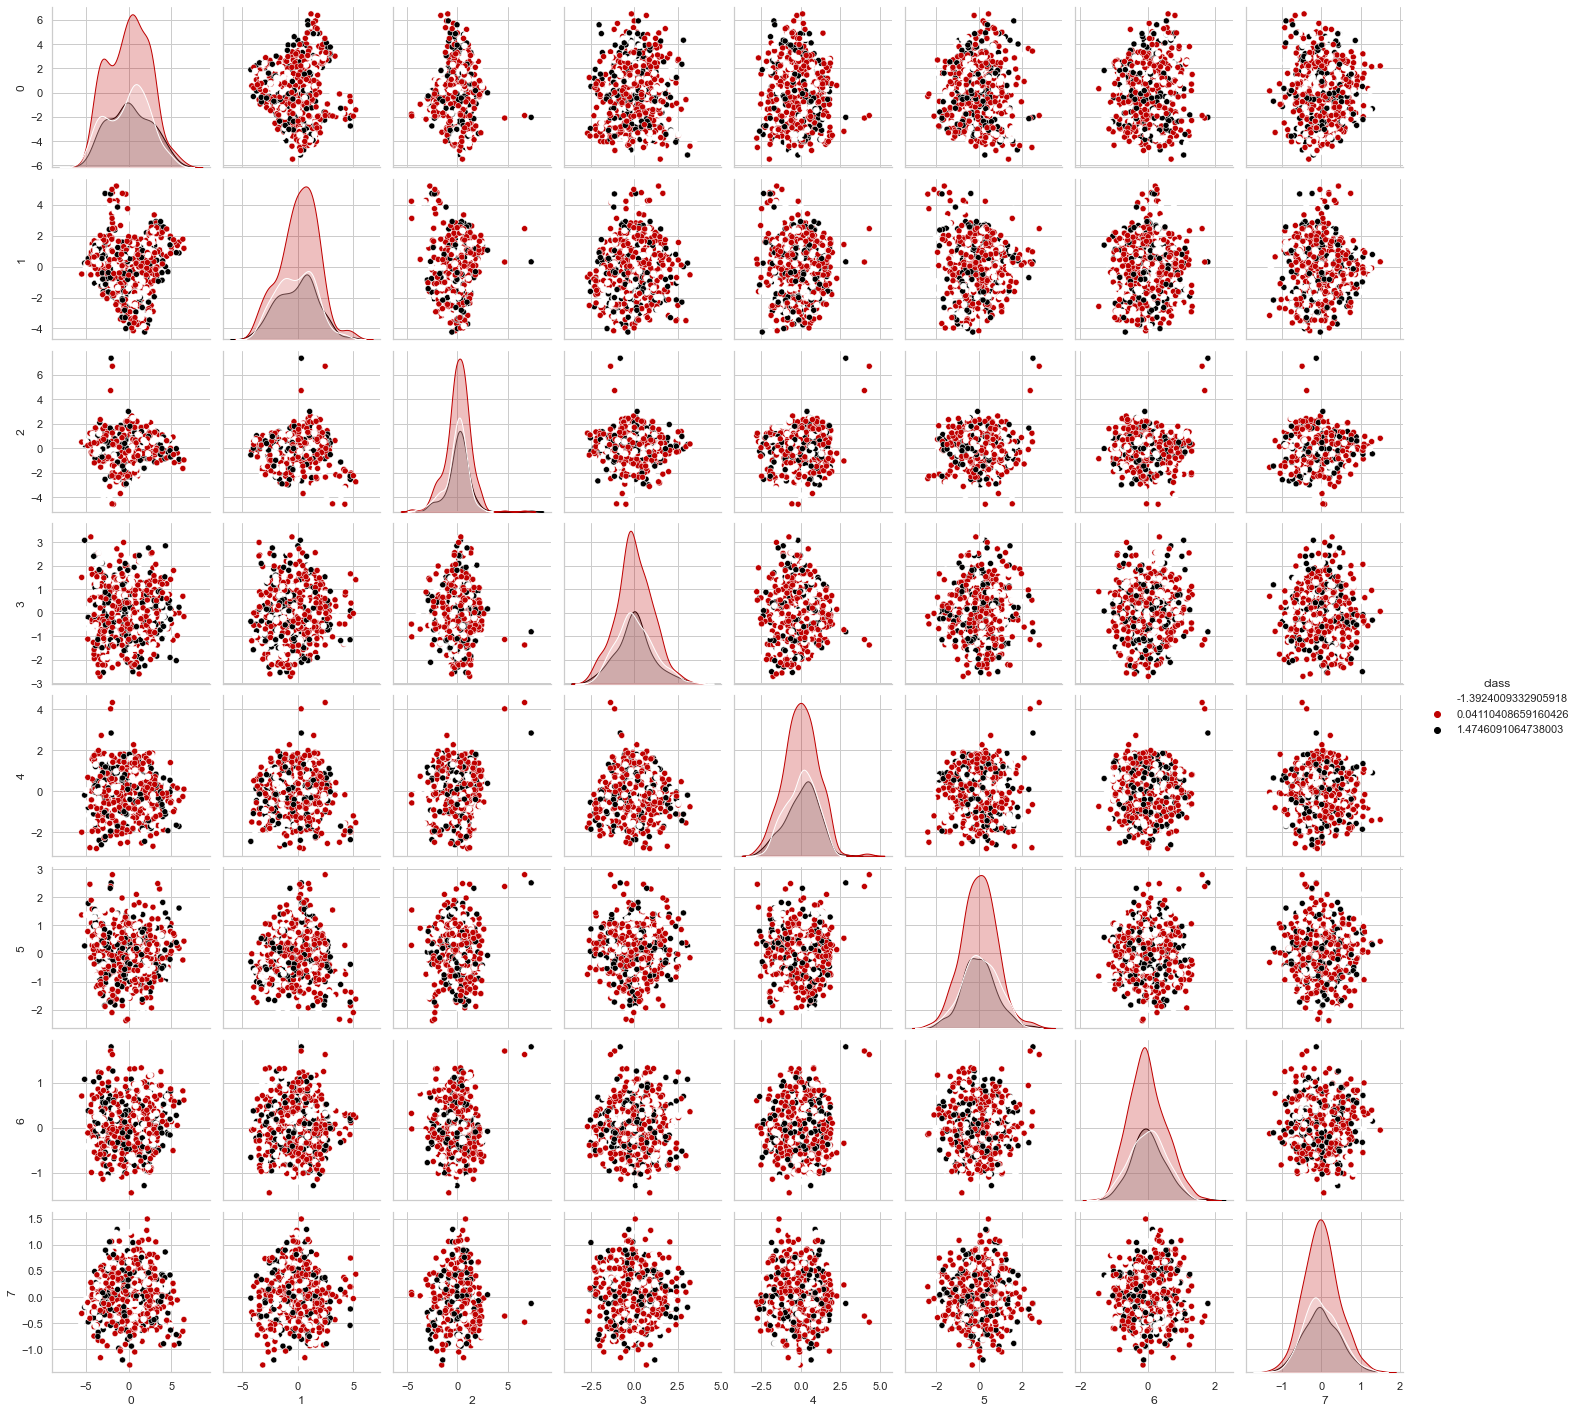

In [278]:
sns.pairplot(p_plot_data, diag_kind='kde', hue='class', palette='gist_heat_r')

In [284]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_PCA8, y, test_size =.30, random_state=10)

printmd('**Training and Testing Set Distribution**', color='brown')

print(f'Training set has {X_pca_train.shape[0]} rows and {X_pca_train.shape[1]} columns')
print(f'Testing set has {X_pca_test.shape[0]} rows and {X_pca_test.shape[1]} columns')

<span style='color:brown'>**Training and Testing Set Distribution**</span>

Training set has 592 rows and 8 columns
Testing set has 254 rows and 8 columns


In [285]:
svm.fit(X_pca_train, y_train)  
y_train_pred = svm.predict(X_pca_train)
y_test_pred = svm.predict(X_pca_test)

#get Precision Score on train and test
accuracy_train = round(metrics.accuracy_score(y_train, y_train_pred),3)
accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred),3)
accdf_pca = pd.DataFrame([[accuracy_train],[accuracy_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
accdf_pca

,Accuracy
Training,0.944
Testing,0.949


In [286]:
confusion_matrix_test_pca = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_test_pca

Predicted,bus,car,van
Actual,,,
bus,67,1,3
car,1,120,4
van,1,3,54


Observation

Total number of Type-I and Type-II errors are 13

Conclusion

Even after reducing dimensions from 13 to 8, we still have achieved very good results by doing PCA in terms for accuracy.